In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt
import scipy.signal as scisig
import analysis_utils as au
import importlib

Charge 

In [130]:
charge_120 = 2.518321e-05

In [12]:
filename = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Charge/10mVnoamp87kHz7.9e-8mbarchannelD.mat'
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSDtmp = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))

In [13]:
dr = []
for i in range(int(len(tt)/10**5)):
    PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
    dr.append(PSD[1][8700])
freq = PSD[0]

In [19]:
np.mean(dr)

8.2177304e-10

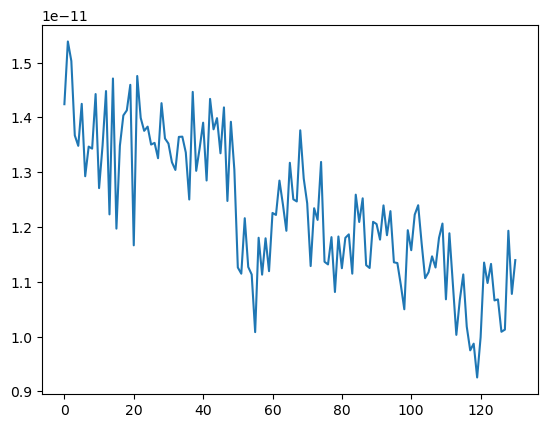

In [18]:
plt.plot(np.array(dr)*10**(-14)/10**(-10)*150)

In [143]:
np.mean(np.sqrt(dr)/charge_120*120)

136.40366

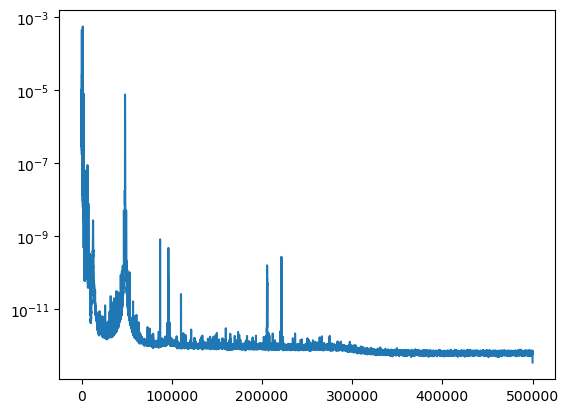

In [144]:
plt.plot(PSDtmp[0], PSDtmp[1])
plt.yscale('log')

B field

In [160]:
path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Perm mag/2.5 V/tt ('
files = [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17]
end = ').mat'
peak_height = []
PSDs = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    for i in range(int(len(tt)/10**5)):
        PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
        peak_height.append(PSD[1][5300])
    PSD = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))
    PSDs.append(PSD[1])
freq = PSD[0]

In [161]:
time = np.linspace(0, 0.1*len(peak_height), len(peak_height))

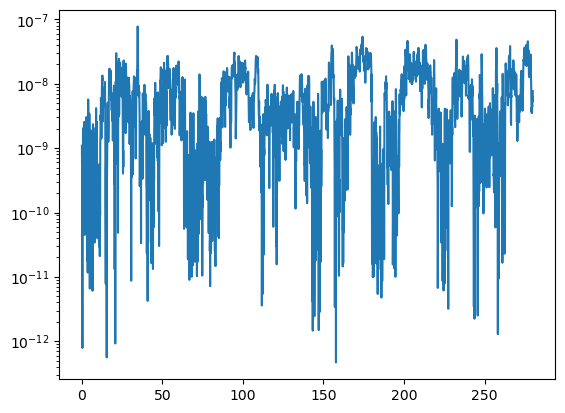

In [162]:
plt.plot(time, peak_height)
plt.yscale('log')

In [163]:
print(np.mean(peak_height[0:1000]))
print(np.mean(peak_height[1000:2000]))
print(np.mean(peak_height[2000:3000]))

5.5800804e-09
6.991836e-09
1.0180796e-08


In [221]:
path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Perm mag/5 V/tt ('
files = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
end = ').mat'
peak_height = []
PSDs = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    for i in range(int(len(tt)/10**5)):
        PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
        peak_height.append(PSD[1][5300])
    PSD = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))
    PSDs.append(PSD[1])
freq = PSD[0]

In [222]:
time = np.linspace(0, 0.1*len(peak_height), len(peak_height))

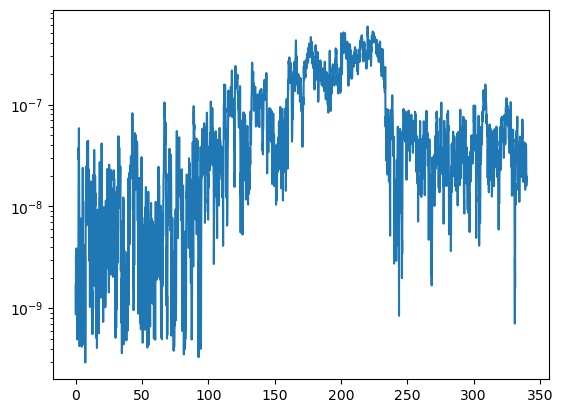

In [223]:
plt.plot(time, peak_height)
plt.yscale('log')

In [224]:
print(np.mean(peak_height[0:1000]))
print(np.mean(peak_height[1200:2200]))
print(np.mean(peak_height[2400:3400]))

1.2085036e-08
1.7813251e-07
3.9432933e-08


In [225]:
peak_height_avr = []
for i in range(0, len(peak_height), 10):
    peak_height_avr.append(np.mean(peak_height[i:i+10]))

Text(0.5, 0, 'Time (s)')

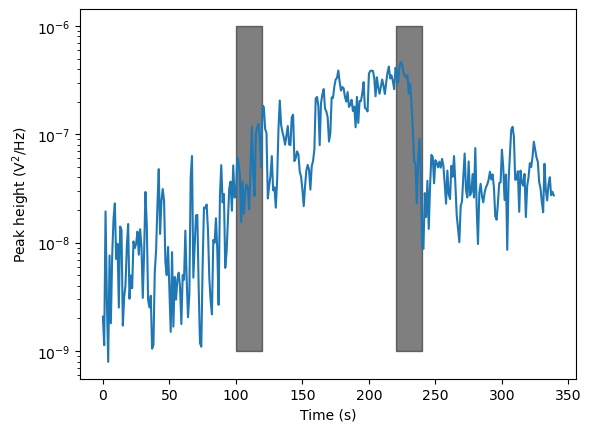

In [226]:
plt.plot(peak_height_avr)
plt.fill_between([100, 120], [10**(-9), 10**(-9)], [10**(-6), 10**(-6)], color = 'k', alpha = 0.5)
plt.fill_between([220, 240], [10**(-9), 10**(-9)], [10**(-6), 10**(-6)], color = 'k', alpha = 0.5)
plt.yscale('log')
plt.ylabel('Peak height (V$^2$/Hz)')
plt.xlabel('Time (s)')

In [203]:
path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Perm mag/10 V/tt ('
files = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29]
end = ').mat'
peak_height4 = []
PSDs4 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    for i in range(int(len(tt)/10**5)):
        PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
        peak_height4.append(PSD[1][5300])
    PSD = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))
    PSDs4.append(PSD[1])
freq = PSD[0]

In [204]:
peak_height_avr = []
for i in range(0, len(peak_height4), 10):
    peak_height_avr.append(np.mean(peak_height4[i:i+10]))

Text(0.5, 0, 'Time (s)')

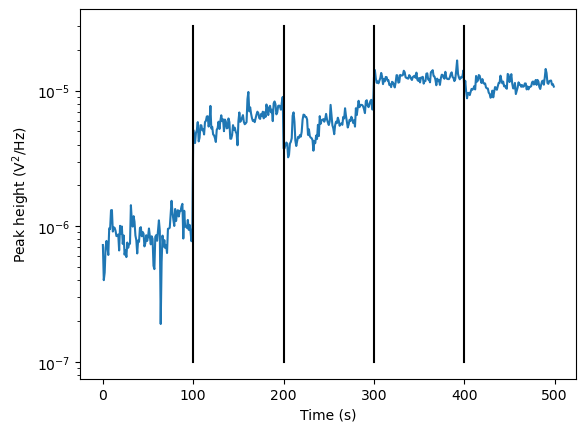

In [219]:
plt.plot(peak_height_avr)
plt.plot([100, 100], [10**(-7), 3*10**(-5)], 'k')
plt.plot([200, 200], [10**(-7), 3*10**(-5)], 'k')
plt.plot([300, 300], [10**(-7), 3*10**(-5)], 'k')
plt.plot([400, 400], [10**(-7), 3*10**(-5)], 'k')
plt.yscale('log')
plt.ylabel('Peak height (V$^2$/Hz)')
plt.xlabel('Time (s)')

In [206]:
ph1 = np.mean(peak_height4[:1000])
ph2 = np.mean(peak_height4[1000:2000])
ph3 = np.mean(peak_height4[2000:3000])
ph4 = np.mean(peak_height4[3000:4000])
ph5 = np.mean(peak_height4[4000:5000])

err1 = np.std(peak_height4[:1000])
err2 = np.std(peak_height4[1000:2000])  
err3 = np.std(peak_height4[2000:3000])
err4 = np.std(peak_height4[3000:4000])
err5 = np.std(peak_height4[4000:5000])

ph = [ph1/(48750**2-53000**2)**2, ph2/(49600**2-53000**2)**2, ph3/(49400**2-53000**2)**2, ph4/(49500**2-53000**2)**2, ph5/(49550**2-53000**2)**2]
err = [err1/(48750**2-53000**2)**2, err2/(49600**2-53000**2)**2, err3/(49400**2-53000**2)**2, err4/(49500**2-53000**2)**2, err5/(49550**2-53000**2)**2]

Text(0.5, 0, 'Measurement number')

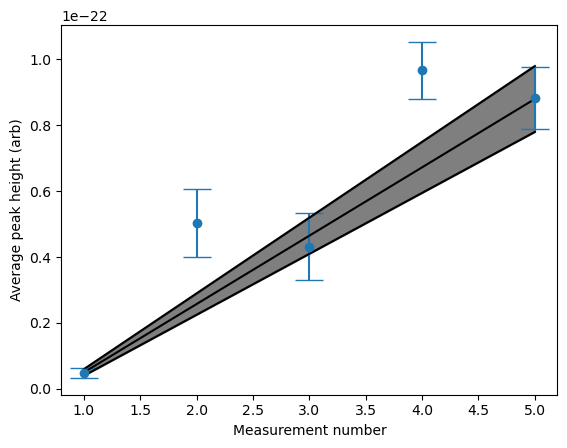

In [216]:
plt.errorbar([1, 2, 3, 4, 5], ph, yerr = err, linestyle = 'none', marker = 'o', capsize = 10)
plt.plot([1, 5], [0.05*10**(-22), 0.88*10**(-22)], 'k-')
plt.plot([1, 5], [0.06*10**(-22), 0.98*10**(-22)], 'k-')
plt.plot([1, 5], [0.04*10**(-22), 0.78*10**(-22)], 'k-')
plt.fill_between([1, 5], [0.04*10**(-22), 0.78*10**(-22)], [0.06*10**(-22), 0.98*10**(-22)], color = 'k', alpha = 0.5)
plt.ylabel('Average peak height (arb)')
plt.xlabel('Measurement number')

In [ ]:
# Lets look at a lock in phase measurement

In [17]:
path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Perm mag/10 V/tt ('
files = [1, 2, 3, 4, 5]
end = ').mat'

phis = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(50):
        step = int(len(phi -100000)/50)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        phis.append(phi_mean)
print(step/10**6)

0.399999


In [19]:
path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Perm mag/10 V/tt ('
files = [7, 8, 9, 10, 11]
end = ').mat'

phis2 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(50):
        step = int(len(phi -100000)/50)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        phis2.append(phi_mean)
print(step/10**6)

0.399999


In [21]:
path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Perm mag/10 V/tt ('
files = [13, 14, 15, 16, 17]
end = ').mat'

phis3 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(50):
        step = int(len(phi -100000)/50)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        phis3.append(phi_mean)
print(step/10**6)

0.399999


In [23]:
path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Perm mag/10 V/tt ('
files = [19, 20, 21, 22, 23]
end = ').mat'

phis4 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(50):
        step = int(len(phi -100000)/50)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        phis4.append(phi_mean)
print(step/10**6)

0.399999


In [24]:
path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Perm mag/10 V/tt ('
files = [25, 26, 27, 28, 29]
end = ').mat'

phis5 = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    for j in range(50):
        step = int(len(phi -100000)/50)
        phi_mean = np.mean(phi[100000+j*step:100000+(j+1)*step])
        phis5.append(phi_mean)
print(step/10**6)

0.399999


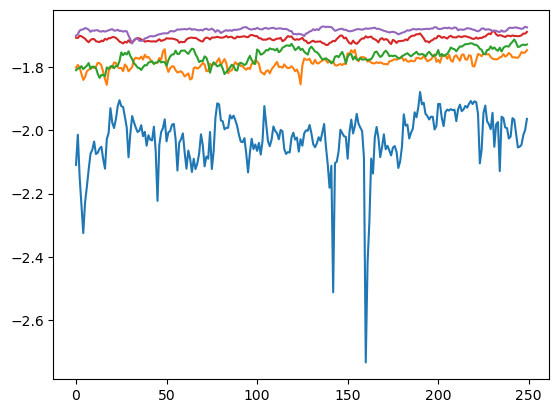

In [25]:
plt.plot(phis)
plt.plot(phis2)
plt.plot(phis3)
plt.plot(phis4)
plt.plot(phis5)

In [114]:
filename = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Coil/10 V/mag.mat'
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSD = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt))
freq = PSD[0]

filename = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Coil/10 V/nomag.mat'
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSD2 = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt))
freq = PSD[0]

filename = 'D:/Lab Data/lorentz_force/sphere_20250321/20250322/Coil/10 V/magnoefield.mat'
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSD3 = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt))
freq = PSD[0]

Text(0.5, 0, 'Frequency (kHz)')

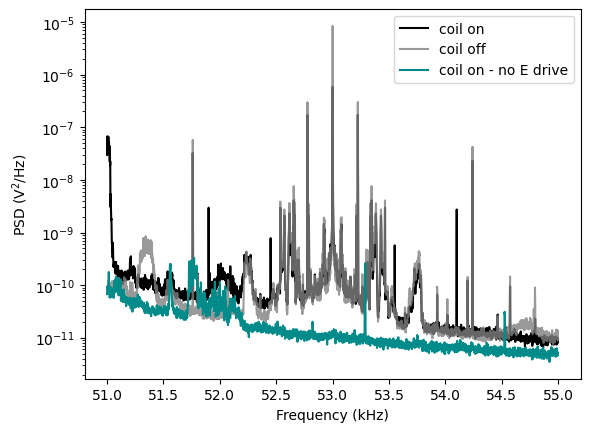

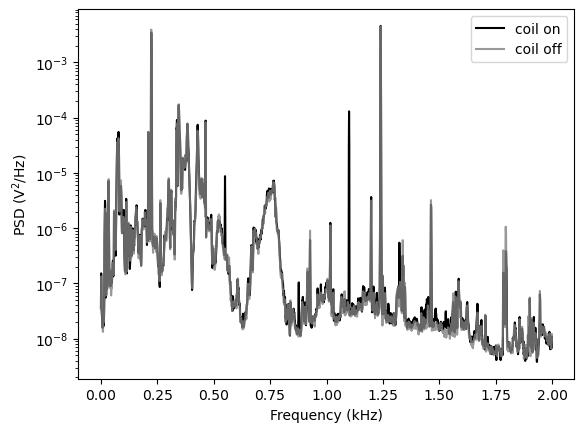

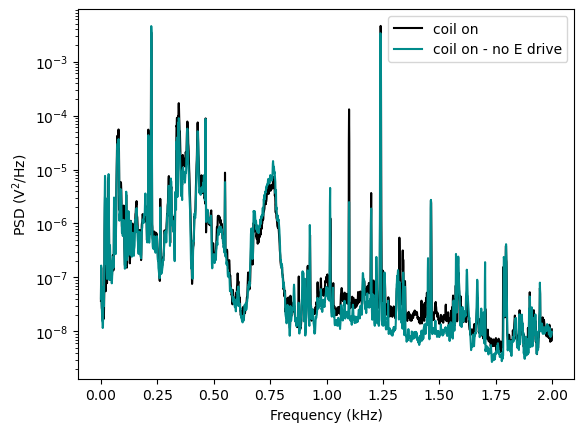

In [108]:
lb = 51000
ub = 55000
plt.plot(freq[lb:ub]/1000, PSD[1][lb:ub], 'k', label = 'coil on')
plt.plot(freq[lb:ub]/1000, PSD2[1][lb:ub], 'gray', alpha = 0.8, label = 'coil off')
plt.plot(freq[lb:ub]/1000, PSD3[1][lb:ub], 'darkcyan', alpha = 1, label = 'coil on - no E drive')
plt.yscale('log')
plt.legend()
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.figure()
lb = 0
ub = 2000
plt.plot(freq[lb:ub]/1000, PSD[1][lb:ub], 'k', label = 'coil on')
plt.plot(freq[lb:ub]/1000, PSD2[1][lb:ub], 'gray', alpha = 0.8, label = 'coil off')
plt.yscale('log')
plt.legend()
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.figure()
lb = 0
ub = 2000
plt.plot(freq[lb:ub]/1000, PSD[1][lb:ub], 'k', label = 'coil on')
plt.plot(freq[lb:ub]/1000, PSD3[1][lb:ub], 'darkcyan', label = 'coil on - no E drive')
plt.yscale('log')
plt.legend()
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')

In [9]:
import numpy as np

m = 4/3*np.pi*(83*10**(-9))**3*2200
q = 100*10**(-19)

np.sqrt(10**(-4)*10**(-14)*(((2*np.pi*49000)**2-(2*np.pi*550)**2)**2+((2*np.pi*550)**2*(2*np.pi*10)**2)**2)*m**2*2/q**2)

78.88058059204161

In [21]:
3*10**(-3)*550*2*np.pi*10

103.67255756846318

In [115]:
filename = 'D:/Lab Data/lorentz_force/sphere_20250321/20250324/Coil/Drive z/50mV3.8e-8.mat'
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSD4 = scisig.welch(tt[:30*10**6], fs=1/dt, nperseg=int(1/dt))
freq = PSD[0]

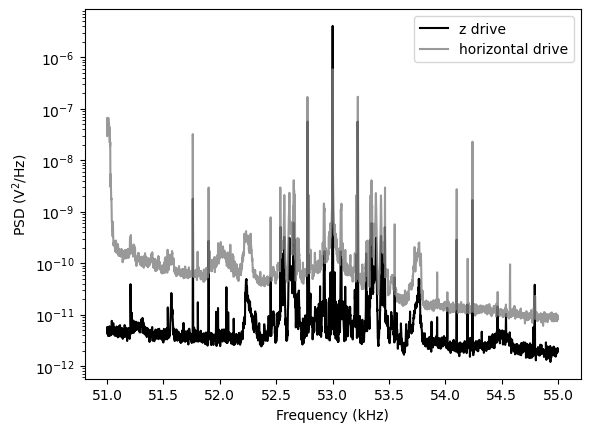

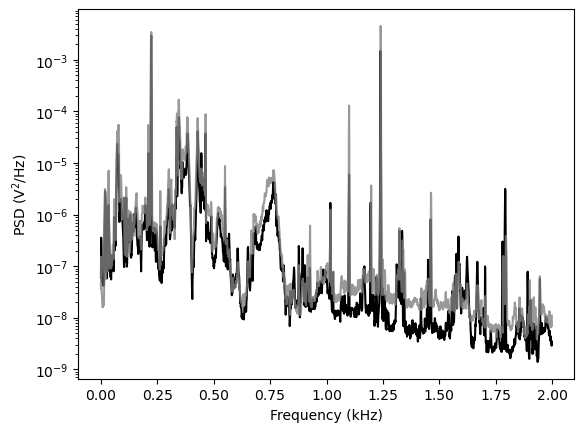

In [124]:
lb = 51000
ub = 55000
plt.plot(freq[lb:ub]/1000, PSD4[1][lb:ub], 'k', label = 'z drive')
plt.plot(freq[lb:ub]/1000, PSD[1][lb:ub], 'gray', alpha = 0.8, label = 'horizontal drive')
plt.legend()
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.yscale('log')
plt.figure()
lb = 0
ub = 2000
plt.plot(freq[lb:ub]/1000, PSD4[1][lb:ub], 'k', label = 'z drive')
plt.plot(freq[lb:ub]/1000, PSD[1][lb:ub], 'gray', alpha = 0.8, label = 'horizontal drive')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.yscale('log')

<Figure size 640x480 with 0 Axes>

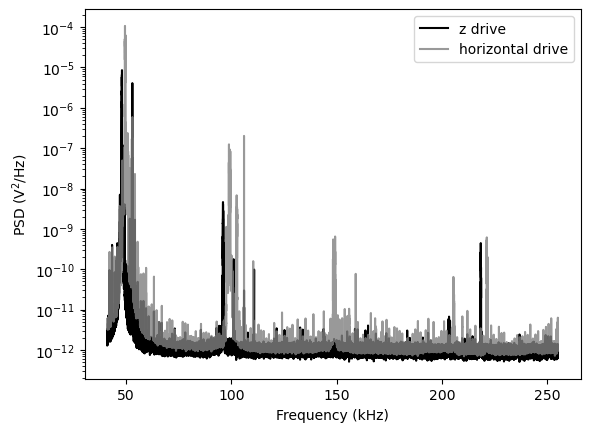

<Figure size 640x480 with 0 Axes>

In [126]:
lb = 41000
ub = 255000
plt.plot(freq[lb:ub]/1000, PSD4[1][lb:ub], 'k', label = 'z drive')
plt.plot(freq[lb:ub]/1000, PSD[1][lb:ub], 'gray', alpha = 0.8, label = 'horizontal drive')
plt.legend()
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.yscale('log')
plt.figure()

In [129]:
1/((48000**2-53000**2)**2/(215000**2-53000**2)**2)

7391.232451720419